### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

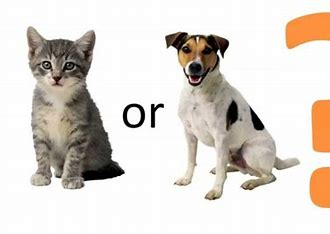

In [3]:
from IPython.display import Image,display,HTML
display(HTML("<h2>Cat Vs Dog Classification</h2>"))
display(Image("images/Cat vs dog.jpg", width=600, height=500, retina=False))

#### Importing Dataset

In [4]:
cats_dogs_classification = pd.read_csv("Extracted data of cats vs dogs/Data/Train.csv")
cats_dogs_classification.head()

,File_Name,Category
0,10846.jpg,1
1,2360.jpg,1
2,17531.jpg,0
3,13254.jpg,1
4,15554.jpg,0


#### Using pandas for numerical operations

In [5]:
cats_dogs_classification.shape

(9471, 2)

In [6]:
cats_dogs_classification.dtypes

File_Name    object
Category      int64
dtype: object

In [7]:
cats_dogs_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File_Name  9471 non-null   object
 1   Category   9471 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 148.1+ KB


In [8]:
cats_dogs_classification.isna().sum()

File_Name    0
Category     0
dtype: int64

### Extracting And Loading Data

In [9]:
import zipfile
import os

# Path to the zip file
zip_file_path = 'data for Cats Vs Dogs/archive.zip'
# Directory where you want to extract the files
extract_dir = 'Extracted Data of cats vs dogs'

# Create the extract directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")


Files extracted to Extracted Data of cats vs dogs


In [10]:
import os
import cv2
import numpy as np

def load_data(data_dir):
    images = []
    labels = []
    train_path = os.path.join(data_dir, 'Train')
    for label in ['Cats', 'Dogs']:
        path = os.path.join(train_path, label)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            if os.path.isdir(img_path):  # Skip directories
                continue
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                image = cv2.resize(image, (64, 64))
                images.append(image)
                labels.append(0 if label == 'Cats' else 1)
            else:
                print(f"Warning: Unable to read image {img_path}")
    return np.array(images), np.array(labels)

# Path to the extracted directory
data_dir = 'Extracted data of cats vs dogs/Data'
images, labels = load_data(data_dir)

print(f"Loaded {len(images)} images.")


Loaded 9471 images.


In [11]:
# Convert images to a DataFrame
cats_dogs_classification = pd.DataFrame(images.reshape(images.shape[0], -1))
cats_dogs_classification['label'] = labels
cats_dogs_classification.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,62,48,49,85,60,88,91,93,86,122,...,77,77,69,67,63,61,56,49,48,0
1,30,90,138,142,147,179,187,180,187,119,...,34,26,68,25,13,17,45,54,23,0
2,74,72,71,77,73,72,73,72,67,63,...,148,194,167,58,181,168,115,36,36,0
3,57,57,57,57,57,57,57,57,56,56,...,125,153,144,183,194,196,195,193,189,0
4,49,114,111,98,110,112,109,95,97,114,...,150,126,146,149,128,145,159,137,128,0


In [12]:
cats_dogs_classification.tail()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
9466,113,113,96,96,77,44,89,79,74,76,...,101,100,98,93,92,89,99,87,95,1
9467,26,34,41,43,40,42,44,42,50,52,...,34,40,42,41,42,38,37,35,36,1
9468,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9469,225,232,234,233,233,229,242,237,242,240,...,160,161,178,168,169,190,202,169,165,1
9470,165,180,175,186,176,106,142,156,155,155,...,102,96,97,92,94,92,100,99,105,1


In [13]:
cats_dogs_classification.shape

(9471, 4097)

#### Displaying Basic Statistics

In [14]:
print(cats_dogs_classification.describe())

                 0            1            2            3            4  \
count  9471.000000  9471.000000  9471.000000  9471.000000  9471.000000   
mean    114.300179   115.011509   115.472178   116.248126   116.971175   
std      69.544467    69.209460    68.996382    68.682928    68.637240   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      56.000000    57.000000    58.000000    59.000000    61.000000   
50%     109.000000   110.000000   111.000000   111.000000   112.000000   
75%     165.000000   166.000000   166.000000   167.000000   167.000000   
max     255.000000   255.000000   255.000000   255.000000   255.000000   

                 5            6            7            8            9  ...  \
count  9471.000000  9471.000000  9471.000000  9471.000000  9471.000000  ...   
mean    117.279379   117.209376   118.156583   118.607750   119.024390  ...   
std      68.622696    68.418437    68.623662    68.419644    68.410431  ...   
min       0.00000

In [15]:
cats_dogs_classification.mean()

0        114.300179
1        115.011509
2        115.472178
3        116.248126
4        116.971175
            ...    
4092     122.602048
4093     122.114138
4094     121.165875
4095     120.376940
label      0.498786
Length: 4097, dtype: float64

In [16]:
cats_dogs_classification.dtypes

0        uint8
1        uint8
2        uint8
3        uint8
4        uint8
         ...  
4092     uint8
4093     uint8
4094     uint8
4095     uint8
label    int32
Length: 4097, dtype: object

In [17]:
cats_dogs_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Columns: 4097 entries, 0 to label
dtypes: int32(1), uint8(4096)
memory usage: 37.0 MB


### Data Visualization

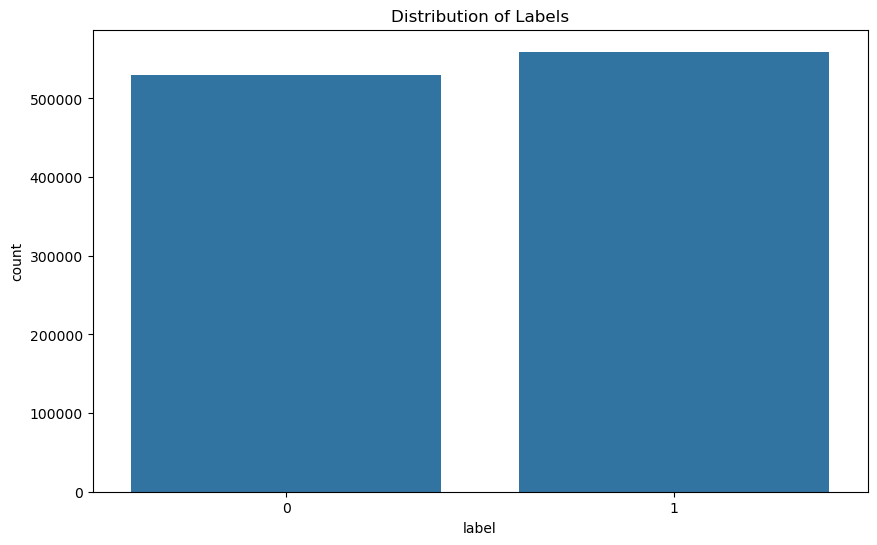

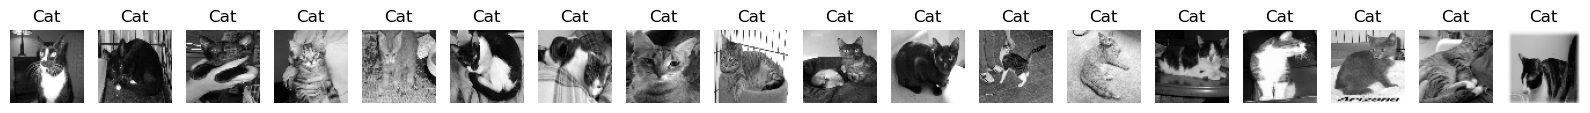

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=cats_dogs_classification)
plt.title('Distribution of Labels')

# Display some sample images in a 2x2 grid
fig, axes = plt.subplots(1, 18, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    if i < len(images):
        ax.imshow(images[i].reshape(64, 64), cmap='gray')
        ax.set_title('Cat' if labels[i] == 0 else 'Dog')
        ax.axis('off')
plt.tight_layout()
plt.show();

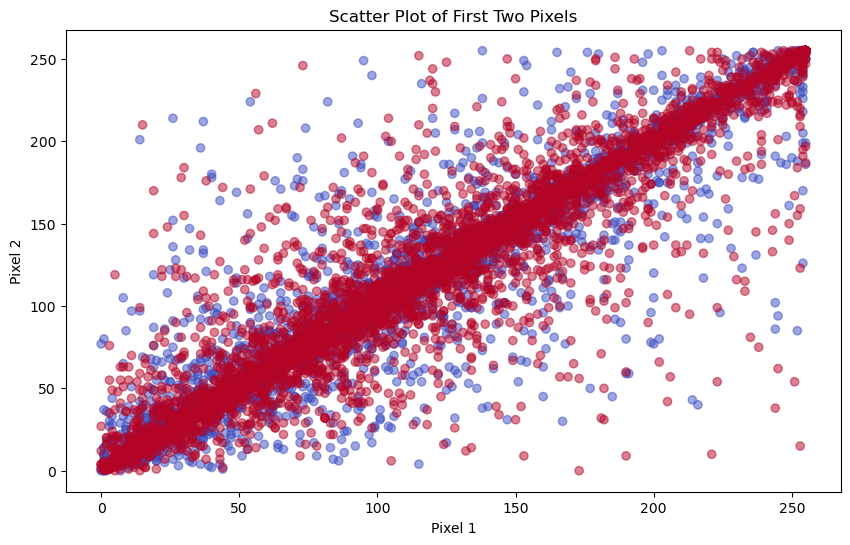

In [19]:
# Scatter plot of the first two pixels
plt.figure(figsize=(10, 6))
plt.scatter(cats_dogs_classification.iloc[:, 0], cats_dogs_classification.iloc[:, 1], c=cats_dogs_classification['label'], cmap='coolwarm', alpha=0.5)
plt.title('Scatter Plot of First Two Pixels')
plt.xlabel('Pixel 1')
plt.ylabel('Pixel 2')
plt.show();

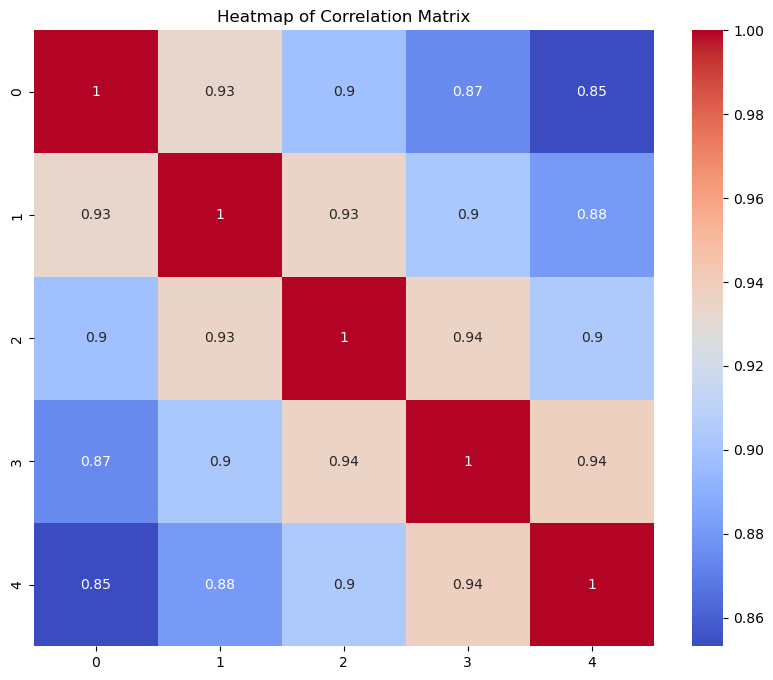

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = cats_dogs_classification.iloc[:, :5].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show();

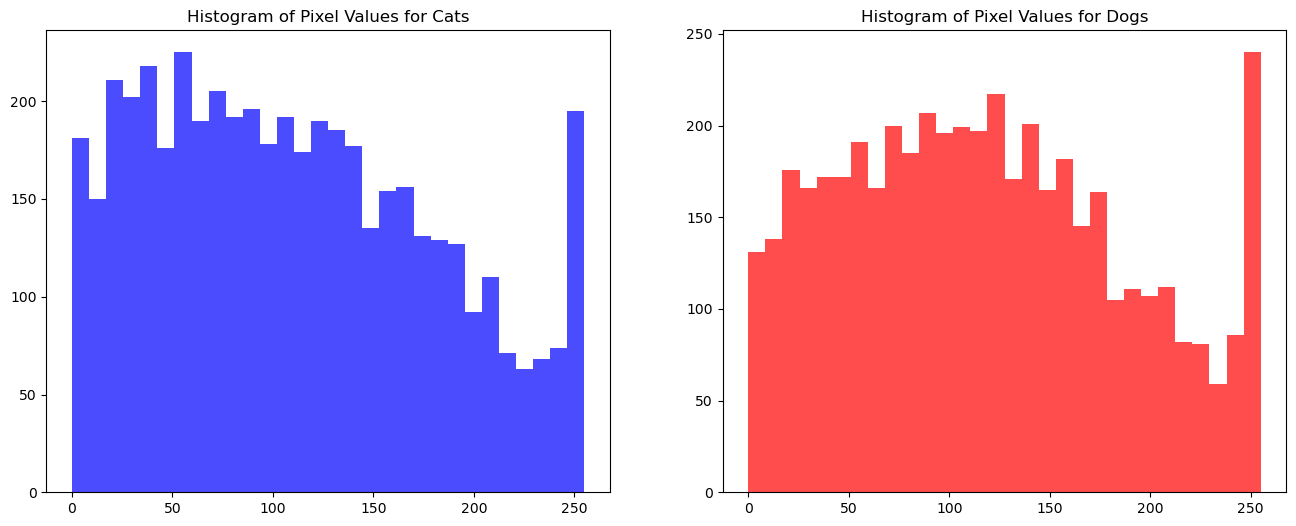

In [21]:
# Plot histograms of pixel values for cats and dogs
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].hist(cats_dogs_classification[cats_dogs_classification['label'] == 0].iloc[:, 0], bins=30, color='blue', alpha=0.7)
axes[0].set_title('Histogram of Pixel Values for Cats')
axes[1].hist(cats_dogs_classification[cats_dogs_classification['label'] == 1].iloc[:, 0], bins=30, color='red', alpha=0.7)
axes[1].set_title('Histogram of Pixel Values for Dogs')
plt.show();

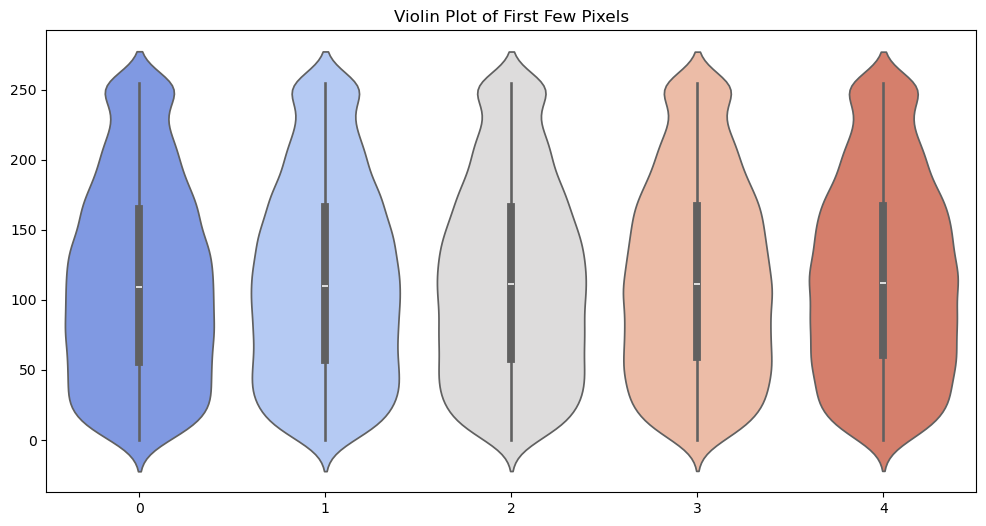

In [22]:
# Violin plot of the first few pixels
plt.figure(figsize=(12, 6))
sns.violinplot(data=cats_dogs_classification.iloc[:, :5], palette='coolwarm')
plt.title('Violin Plot of First Few Pixels')
plt.show();

**Violin plots** can show the distribution of pixel values for each class, combining aspects of box plots and density plots.

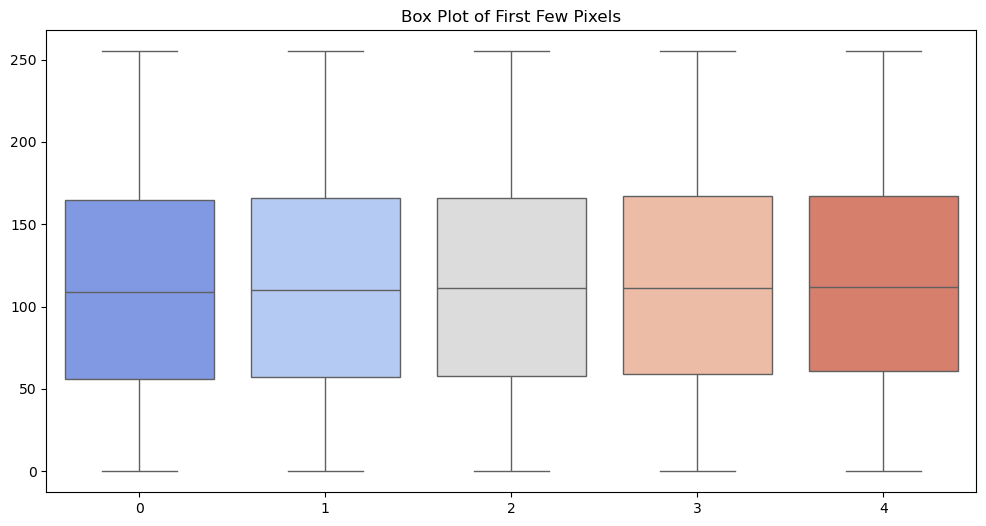

In [23]:
# Box plot of the first few pixels
plt.figure(figsize=(12, 6))
sns.boxplot(data=cats_dogs_classification.iloc[:, :5], palette='coolwarm')
plt.title('Box Plot of First Few Pixels')
plt.show();

#### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

# Normalize pixel values to range [0, 1]
images = images / 255.0

### Data Augmentation

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to your images
datagen.fit(images.reshape(images.shape[0], 64, 64, 1))

# Applying data augmentation to a single image
augmented_images = datagen.flow(images.reshape(images.shape[0], 64, 64, 1), labels, batch_size=32)


- ImageDataGenerator instance with various augmentation parameters such as rotation, width shift, height shift, shear, zoom, and horizontal flip. It then fits the generator to your images and applies the augmentations.

### Training The Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Reshape images to fit the model
images = images.reshape(images.shape[0], -1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Initialize the SVC model
svc = SVC(kernel='linear')

# Train the model
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVC model
svc = SVC(kernel='linear')

# Train the model
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 49.71%


### Hyperparameter Tuning and Cross-Validation

In [28]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into a smaller subset for the initial search
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Define a reduced parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01],
    'kernel': ['rbf', 'poly']
}

# Initialize the SVC model
svc = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svc, param_grid, refit=True, verbose=2, cv=3)

# Fit the model on the smaller subset
grid_search.fit(X_train_subset, y_train_subset)

# Get the best parameters from the initial search
best_params = grid_search.best_params_
print(f"Best Parameters from initial search: {best_params}")

# Use the best parameters to fit the model on the full training set
svc_best = SVC(**best_params)
svc_best.fit(X_train, y_train)

# Make predictions with the best model
y_pred = svc_best.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   8.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   6.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   7.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   4.8s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   4.6s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   4.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   7.5s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   7.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   7.2s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   4.8s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   4.9s
[CV] END .....................C=0.1, gamma=0.01,

In [29]:
# Calculating New Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 64.06%


### Evaluation Of Model

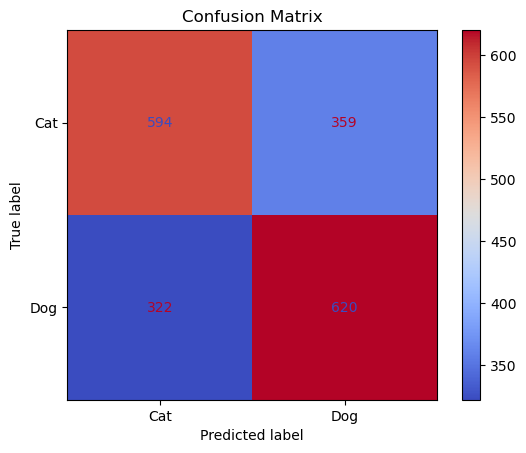

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])

# Plot the confusion matrix
disp.plot(cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show();

 As for now, we can observe
- True Positives (Dog predicted as Dog): 620
- True Negatives (Cat predicted as Cat): 594
- False Positives (Cat predicted as Dog): 359
- False Negatives (Dog predicted as Cat): 322

- This indicates that our model is better at predicting dogs than cats, as it has a high number of false negatives for the 'Cat' class and a few false positives for the 'Dog' class.

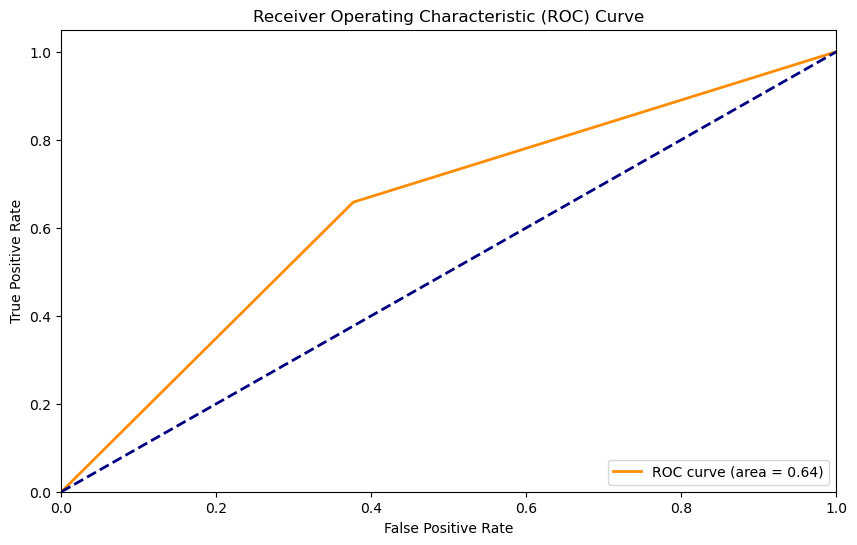

In [31]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();